[Circle(x=-0.870435674782115, y=-0.07960900446544382, r=0.12593143431114334, level=1, ex={'datum': 1}),
 Circle(x=-0.5932602144828303, y=-0.20452975474670634, r=0.17809394233191544, level=1, ex={'datum': 2}),
 Circle(x=-0.6622462609299455, y=0.1943039587412656, r=0.21811964249692284, level=1, ex={'datum': 3}),
 Circle(x=-0.3256418302158876, y=-0.5410461134698134, r=0.2518628686222867, level=1, ex={'datum': 4}),
 Circle(x=-0.3805741891177557, y=0.607065170177418, r=0.2815912476237659, level=1, ex={'datum': 5}),
 Circle(x=0.23468265461951263, y=-0.5384228903031626, r=0.3084677566391192, level=1, ex={'datum': 6}),
 Circle(x=0.23395509820613103, y=0.624427401857965, r=0.3331832574329519, level=1, ex={'datum': 7}),
 Circle(x=-0.11242478710544043, y=0.028395903858600517, r=0.3561878846638309, level=1, ex={'datum': 8}),
 Circle(x=0.6215574004918205, y=0.028395903858600517, r=0.37779430293343, level=1, ex={'datum': 9}),
 Circle(x=0, y=0, r=1, level=1, ex=None)]


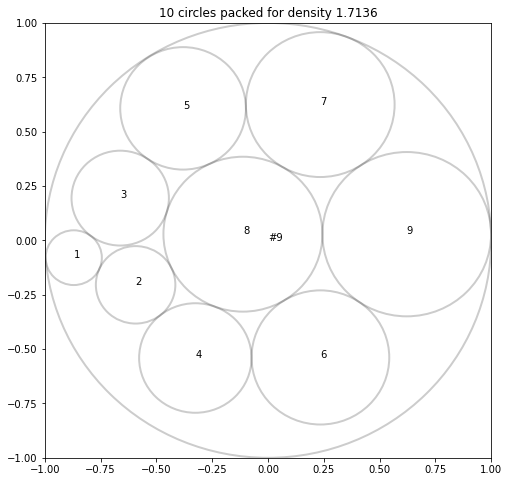

In [2]:
from pprint import pprint
import circlify
circles = circlify.circlify([9, 8, 7, 6, 5, 4, 3, 2, 1], show_enclosure=True, target_enclosure=circlify.Circle(x=0, y=0, r=1))
	# (necessary) data: A list of positive values sorted from largest to smallest
  	# (optional) target_enclosure: A target enclosure where the packed circles should fit (default to the unit circle (0, 0, 1))
  	# (optional) show_enclosure: A boolean indicating if the target enclosure should be appended to the output (default to False)
pprint(circles)
circlify.bubbles(circles=circles) # Graph of the packed circles

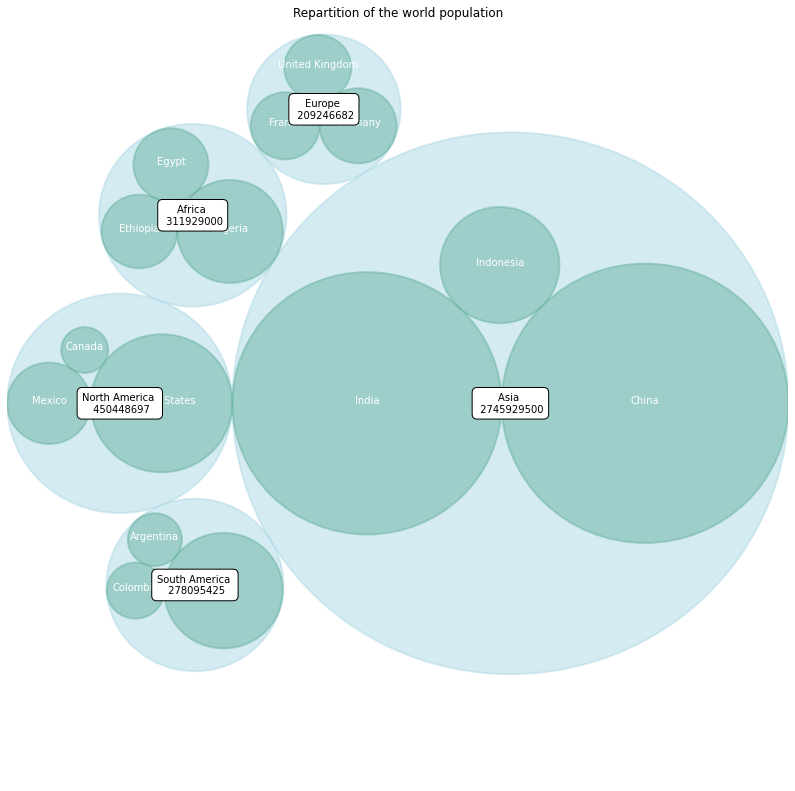

In [3]:
# Viz--> Circular Packing with multi-level Hierarchy
# Source: https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/circular-packing-several-levels-of-hierarchy.ipynb
# Pre-requisite Packages----> circlify
# Hierarchical Data of Popultaion of World->Continent->Country 
# import the circlify library
import circlify
import matplotlib.pyplot as plt

data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]



# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"] + " \n " +  str(circle.ex["datum"] ) 
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))


    